In [2]:
import pandas as pd
from fbprophet import Prophet
from pathlib import Path

In [3]:
df = pd.read_csv(Path('..\Data\\usdc-usd-max.csv'))[['snapped_at', 'price']]
df.head()

,snapped_at,price
0,2018-10-05 00:00:00 UTC,1.006242
1,2018-10-06 00:00:00 UTC,1.001530
2,2018-10-07 00:00:00 UTC,1.001177
3,2018-10-08 00:00:00 UTC,1.001906
4,2018-10-09 00:00:00 UTC,1.001983


In [8]:
df.rename(columns={'snapped_at': 'ds', 'price': 'y'}, inplace=True)
df['ds'] = pd.to_datetime(df['ds']).dt.tz_localize(None)
# df = df.loc[df['ds'].dt.year >= 2021]
df.head()

,ds,y
88,2019-01-01,0.997689
89,2019-01-02,0.995185
90,2019-01-03,0.993591
91,2019-01-04,0.996825
92,2019-01-05,0.996648


In [9]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=90)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
0,2019-01-01,0.992747,0.989055,0.996258
1,2019-01-02,0.993414,0.989726,0.997060
2,2019-01-03,0.993715,0.990130,0.997356
3,2019-01-04,0.994518,0.990924,0.998339
4,2019-01-05,0.994776,0.991554,0.998462


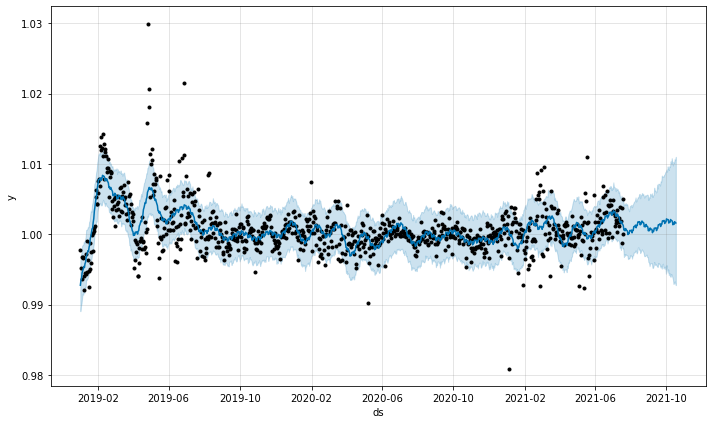

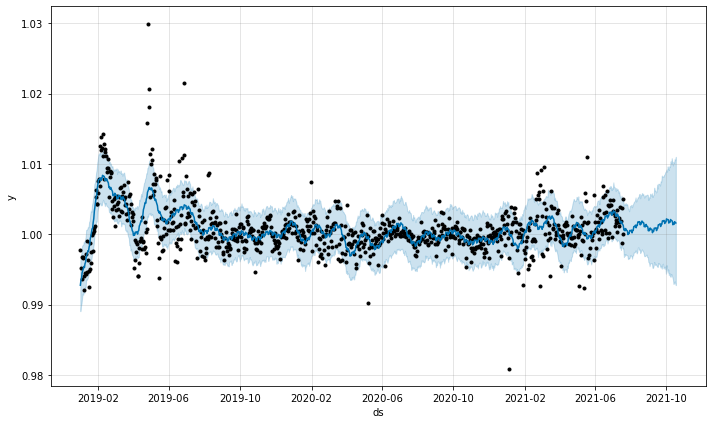

In [10]:
m.plot(forecast)

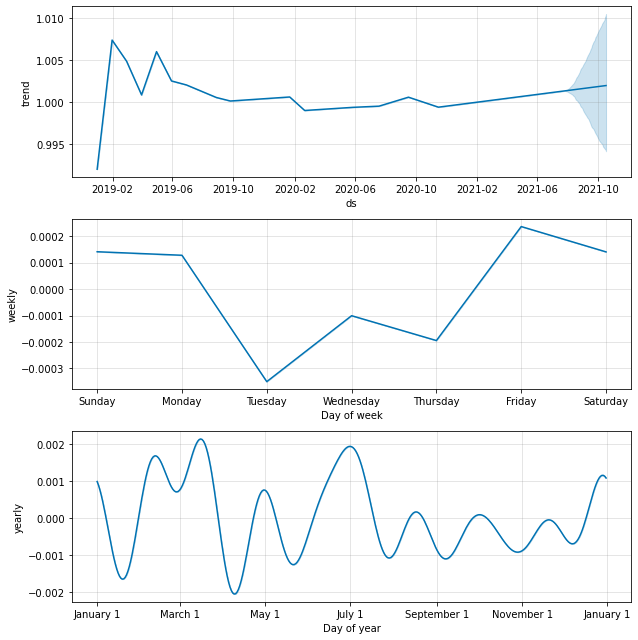

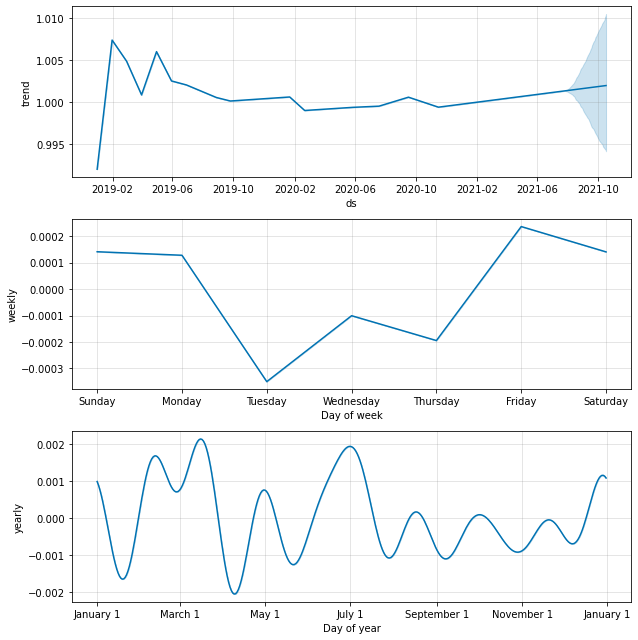

In [11]:
m.plot_components(forecast)